
**Preconditions**

$Y_1,\dots,Y_n$ are independent

$Y_i\sim Exp(\theta), \forall i\in\{1,\dots,n\}$

# #1a - Simulation of the distribution of ML Estimator $\hat\theta=\cfrac{n}{\sum\limits_{i=1}^{n}Y_i}$:

$\theta = 2$

In [7]:
theta<-2
n<-seq(1:20)*10
nr_samples<-1000

In [8]:
bias<-function(n){
  ret<-rep(0,nr_samples)
  for (i in 1:nr_samples){
    y<-rexp(n,rate = theta)
    ret[i]<-n/sum(y)
  }
  
  mean(ret)-theta
}

In [4]:
variance<-function(n){
  ret<-rep(0,n)
  for (i in 1:nr_samples){
    y<-rexp(n,rate = theta)
    ret[i]<-n/sum(y)
  }
  var(ret)
}


In [5]:
par(mfrow=c(1,2))

bias.vec<-Vectorize(bias,'n')
variance.vec<-Vectorize(variance,'n')
exp_bias=bias.vec(n)
exp_var=variance.vec(n)

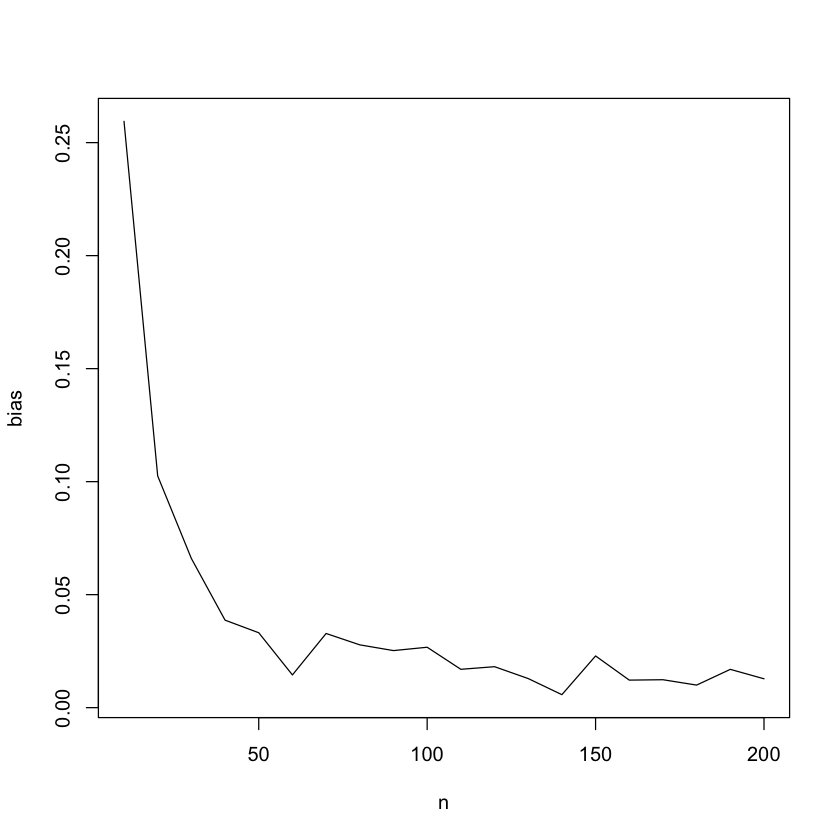

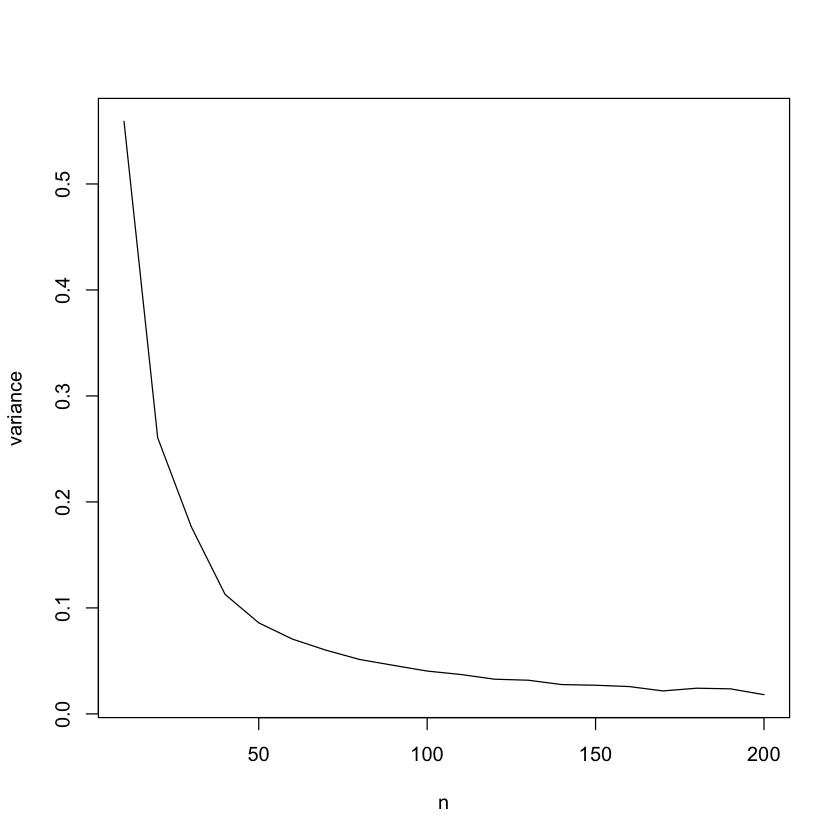

In [6]:
plot(x = n,y = exp_bias,type = 'l',ylab = 'bias')
plot(x = n,y = exp_var,type = 'l',ylab = 'variance')

# #1b - Calculation of Theoretical values of Bias and Variance of the Maximum Likelihood Estimator $\hat\theta$

In order to calculate the expected value and the variance of $\hat\theta=\cfrac{n}{\sum\limits_{i=1}^{n}Y_i}$ we first calculate the density function $f_{S_n}$ of $S_n=\sum\limits_{i=1}^{n}Y_i$:


**Calculating the density**

For $n=2$ we have $f_{S_2}=f_{Y_1}\ast f_{Y_2}$

$\Rightarrow f_{S_2}(z)=\int\limits_\mathbb{R}f_{Y_1}(x)f_{Y_2}(z-x)dx$

$=\int\limits_{0}^{z}f_{Y_1}(x)f_{Y_2}(z-x)dx$ (Because $f_{Y_i}(x)=0$, for $x<0$)

$=\theta^2\int\limits_{0}^{z}e^{-\theta z}dx$

$=\theta^2 z e^{-\theta z}$

Furthermore, since for $x<0$ $f_{Y_1}(x)=0$ and $f_{Y_2}(x)=0$, then for $x<0$ also $f_{S_2}(x)=0$

For $n=3$ we have $f_{S_3}=f_{Y_1}\ast f_{Y_2}\ast f_{Y_3}=f_{S_2}\ast f_{Y_3}$

$\Rightarrow f_{S_3}(z)=\int\limits_\mathbb{R}f_{S_2}(x)f_{Y_3}(z-x)dx$

$=\int\limits_{0}^{z}\theta^2 x e^{-\theta x}\theta e^{-(z-x)\theta}dx$

$=\theta^3\int\limits_{0}^{z}x e^{-\theta z}dx$

$=\theta^3 e^{-\theta z}\int\limits_{0}^{z}x dx$

$=\theta^3 e^{-\theta z}(\frac{x^2}{2}|_0^z)$

$=\theta^3 e^{-\theta z}\frac{z^2}{2}$

$=\frac{\theta^3 e^{-\theta z}z^2}{2}$

It is easy to see that the following applies for the further folds

$f_{S_{n+1}}(z)=f_{S_n}\cdot\frac{\theta z}{n}$

thus $f_{S_n}(x)=\frac{\theta^n x^{n-1} e^{-\theta x}}{(n-1)!}$

**Now calulating the Expected value**

For the Expected value of $S_n$:

$\mathbb{E}(S_n)=\mathbb{E}\left(\sum\limits_{i=1}^{n}Y_i\right)=\sum\limits_{i=1}^{n}\mathbb{E}(Y_i)=\frac{n}{\theta}$

For the Variance of $S_n$:

$Var(S_n)=Var\left(\sum\limits_{i=1}^{n}Y_i\right)=\sum\limits_{i=1}^{n}Var(Y_i)=\frac{n}{\theta^2}$

with the density for $S_n$ we can now calculate the  **Expected value** of $\frac{n}{S_n}$:

$\mathbb{E}\left(\frac{n}{S_n}\right)=\int\limits_0^{\infty}\frac{n}{x}\frac{\theta^n x^{n-1} e^{-\theta x}}{(n-1)!}dx$

$=\frac{n\theta^2}{(n-1)(n-2)}\int\limits_0^{\infty}x\frac{\theta^{n-2}x^{n-3}e^{-\theta x}}{(n-3)!}dx$

$=\frac{n\theta^2}{(n-1)(n-2)}\mathbb{E}(S_{n-2})$

$=\frac{n\theta^2}{(n-1)(n-2)}\frac{(n-2)}{\theta}$

$=\frac{n\theta}{n-1}$


**Calculating the Bias**

For the **Bias** of $S_n$:

$Bias\left(\frac{n}{S_n}\right)=\mathbb{E}\left(\frac{n}{S_n}\right)-\theta=\frac{n\theta}{n-1}-\theta=\frac{\theta}{n-1}$

**Calculating the Variance**

For the **Variance** of $S_n$:

$Var\left(\frac{n}{S_n}\right)=\mathbb{E}\left((\frac{n}{S_n})^2\right)-\mathbb{E}\left(\frac{n}{S_n}\right)^2$

$=\int\limits_0^{\infty}\left(\frac{n}{x}\right)^2\cdot\frac{1}{(n-1)!}\theta^n x^{n-1} e^{-\theta x}dx-\frac{(n\theta)^2}{(n-1)^2}$

$=\frac{n^2\theta^3}{(n-1)(n-2)(n-3)} f_{S_{n-3}}-\frac{(n\theta)^2}{(n-1)^2}$

$=\frac{n^2\theta^3}{(n-1)(n-2)(n-3)}\cdot\frac{n-3}{\theta}-\frac{(n\theta)^2}{(n-1)^2}$

$=\frac{n^2\theta^2}{(n-1)^2(n-2)}$

In [12]:
bias_exact<-function(n){
  theta/(n-1)
}

variance_exact<-function(n){
  (theta^2)*(n^2)/((n-1)^2*(n-2))
}

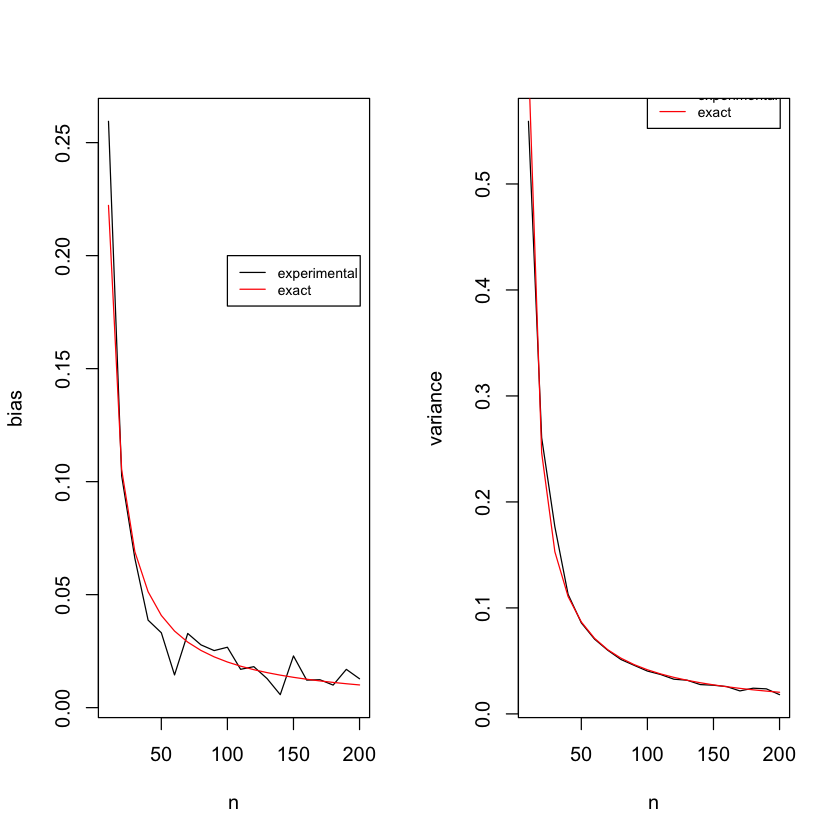

In [13]:
par(mfrow=c(1,2))
plot(x = n,y = exp_bias,type = 'l',ylab = 'bias')
points(x = n, y =bias_exact(n),col=2,type = 'l' )
legend(x=100,y = 0.2,legend=c("experimental", "exact"),
       col=c(1,2),lty=1, cex=0.7)
plot(x = n,y = exp_var,type = 'l',ylab = 'variance')
points(x = n, y =variance_exact(n),col=2,type = 'l' )
legend(x=100,y = 0.6,legend=c("experimental", "exact"),
       col=c(1,2),lty=1, cex=0.7)

# #2. Comparison of variances of ML Estimator and that of the Rao-Cramér lower bound

It applies to *Likelihood*:

$\mathcal{L}(\theta)=\prod\limits_{i=1}^{n}\theta e^{-\theta Y_i}$

Thus the *loglikelihood* is given as :

$\ell(\theta)=\sum\limits_{i=1}^{n}\log(\theta e^{-\theta Y_i})$

From this follows for the *score function*:

$S(\theta)=\frac{\partial}{\partial\theta}\ell(\theta)=\sum\limits_{i=1}^{n}\frac{\partial}{\partial\theta}\log(\theta e^{-\theta Y_i})$

$=\sum\limits_{i=1}^{n}\frac{1}{\theta e^{-\theta Y_i}}\left(e^{-\theta Y_i}-Y_i e^{-\theta Y_i}\theta\right)$

$=\sum\limits_{i=1}^{n}\frac{1-\theta Y_i}{\theta}$

This results in the *expected Fisher information*:

$F(\theta)=\mathbb{E}\left(-\frac{\partial}{\partial\theta}S(\theta)\right)=\mathbb{E}\left(-\sum\limits_{i=1}^{n}\frac{\partial}{\partial\theta}\frac{1-\theta Y_i}{\theta}\right)$

$=\mathbb{E}\left(-\sum\limits_{i=1}^{n}\frac{-\theta Y_i-(1-\theta Y_i)}{\theta^2}\right)$

$=\mathbb{E}\left(-\sum\limits_{i=1}^{n}-\frac{1}{\theta^2}\right)=\mathbb{E}\left(\frac{n}{\theta^2}\right)$

$=\frac{n}{\theta^2}$

So under regularity conditions.

$Var(\hat\theta)\geq\frac{1}{F(\theta)}=\frac{\theta^2}{n}$

In [16]:
variance_lower_bound<-function(n){
  theta^2/n
}

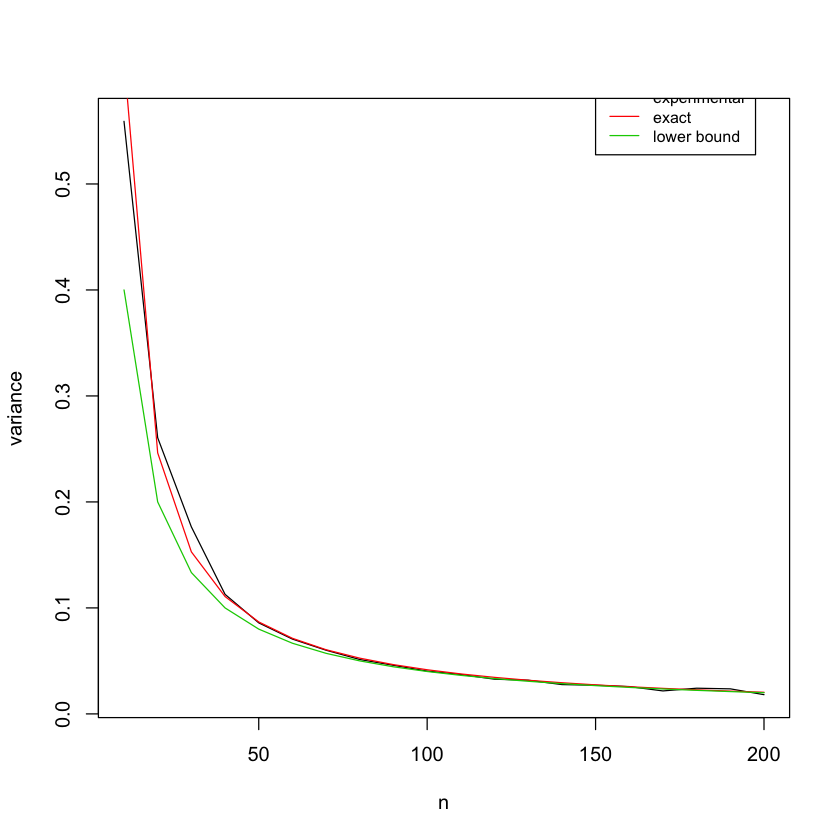

In [17]:
plot(x = n,y = exp_var,type = 'l',ylab = 'variance')
points(x = n, y =variance_exact(n),col=2,type = 'l' )
points(x = n, y =variance_lower_bound(n),col=3,type = 'l' )
legend(x=150,y = 0.6,legend=c("experimental", "exact", "lower bound"),
       col=c(1,2,3),lty=1, cex=0.8)